# 第1章 Molオブジェクトの使い方
第1章ではRDKitで最もよく使われるMolオブジェクトの基本的な使い方を確認する。

## 00. バージョン確認
現在インストールされているRDKitのバージョンを表示せよ。

In [1]:
import rdkit

print(rdkit.__version__)

2019.09.3


RDKit WARNING: [01:05:01] Enabling RDKit 2019.09.3 jupyter extensions


**解説** 上の書き方が最もPythonらしいとされているが、次のような書き方もできる。（参考: [Version info from python - Issue #380](https://github.com/rdkit/rdkit/issues/380)）

In [2]:
from rdkit import rdBase

print(rdBase.rdkitVersion)

2019.09.3


## 01. SMILESの読み込み
SMILES `Cc1ccccc1` で表される分子のMolオブジェクトを`mol`という名前で作成せよ。

In [3]:
from rdkit import Chem

mol = Chem.MolFromSmiles('Cc1ccccc1')

**解説** SMILESを読み込むためには`MolFromSmiles()` を使う。

## 02. 分子の表示
01 で作成した分子の構造式をJupyter Notebook上に表示せよ。

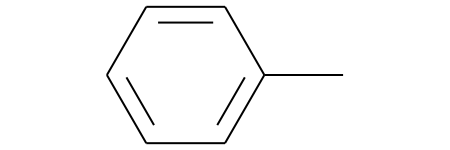

In [4]:
mol

**解説** RDKitには様々な分子の表示方法があるが、Jupyter Notebook上ではMolオブジェクト名のみを書いたセルを実行するのが最も簡単である。分子の表示方法については第2章で詳しく述べるが、次のような別解もある。

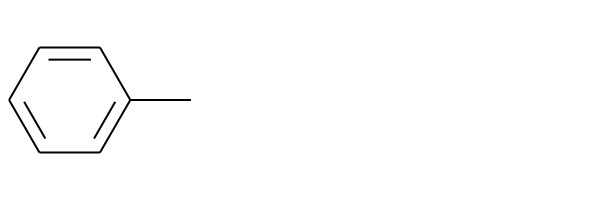

In [5]:
from rdkit.Chem import Draw

Draw.MolsToGridImage([mol])

## 03. Canonical SMILES への変換
SMILES `[C@](Br)(Cl)(CCCC(F)C1)1` をCanonical SMILESに変換し、表示せよ。

In [6]:
canonical_smiles = Chem.MolToSmiles(Chem.MolFromSmiles('[C@](Br)(Cl)(CCCC(F)C1)1'))
print(canonical_smiles)

FC1CCC[C@@](Cl)(Br)C1


**解説** RDKitでは `MolToSmiles()` が出力するSMILESをCanonical SMILESと呼ぶことが多いが、Canonical SMILESの生成アルゴリズムはソフトによって異なることに注意する必要がある。

## 04. 水素を含まない原子数のカウント
SMILES `Cc1ccccc1` で表される分子に含まれる水素以外の原子の個数を出力せよ。

In [7]:
mol = Chem.MolFromSmiles('Cc1ccccc1')
print(mol.GetNumHeavyAtoms())

7


**解説** 分子に含まれる水素以外の原子の個数は `GetNumHeavyAtoms()` を使って求めることができる。

## 05. 水素を含む原子数のカウント
SMILES `Cc1ccccc1` で表される分子に水素を付加し、水素を含む原子の個数を出力せよ。

In [8]:
mol = Chem.MolFromSmiles('Cc1ccccc1')
mol_with_H = Chem.AddHs(mol)
print(mol_with_H.GetNumAtoms())

15


**解説** RDKitのデフォルトでは水素を暗黙的に扱うため、水素を明示的に扱いたい場合には `AddHs()` を実行する必要がある。付加した水素を削除するには `RemoveHs()` を用いる。

7
15
7


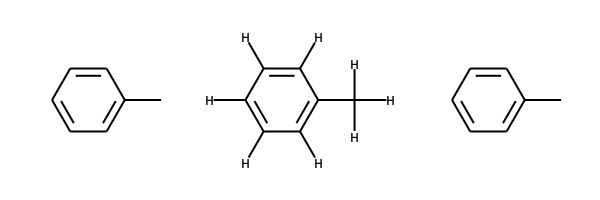

In [9]:
mol = Chem.MolFromSmiles('Cc1ccccc1')
print(mol.GetNumAtoms())    # 水素が暗黙的に扱われているので7となる

mol_with_H = Chem.AddHs(mol)        # 水素を付加する
print(mol_with_H.GetNumAtoms())     # 水素が明示的に扱われているので15となる

mol_without_H = Chem.RemoveHs(mol_with_H)  # 水素を削除する
print(mol_without_H.GetNumAtoms())         # 水素が削除されたので7となる
Draw.MolsToGridImage([mol, mol_with_H, mol_without_H])  # 水素表示のオン・オフが切り替わる

## 06. 原子に対するループ
SMILES `CC(N)=O` で表される分子に含まれる水素以外の原子について、原子のインデックス・元素記号・原子番号を表示せよ。

In [10]:
mol = Chem.MolFromSmiles('CC(N)=O')
for atom in mol.GetAtoms():
    print(atom.GetIdx(), atom.GetSymbol(), atom.GetAtomicNum())

0 C 6
1 C 6
2 N 7
3 O 8


**解説** `GetAtoms()` を使うことで分子内の原子に対するループを書くことができる。
各原子について元素記号や原子番号の他にも質量や形式電荷・隣接する原子などの情報を取得することもできる。
詳細はドキュメントの[rdkit.Chem.rdchem](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html)を参照すること。

## 07. 結合に対するループ
SMILES `CC(N)=O` で表される分子に含まれる水素以外の原子間の結合について、結合のインデックス・結合の種類・両端の原子の原子記号を表示せよ。

In [11]:
mol = Chem.MolFromSmiles('CC(N)=O')
for bond in mol.GetBonds():
    begin_idx = bond.GetBeginAtomIdx()
    end_idx = bond.GetEndAtomIdx()
    begin_atom = mol.GetAtomWithIdx(begin_idx)
    end_atom = mol.GetAtomWithIdx(end_idx)
    print(bond.GetIdx(), bond.GetBondType(), begin_atom.GetSymbol(), end_atom.GetSymbol())

0 SINGLE C C
1 SINGLE C N
2 DOUBLE C O


**解説** `GetBonds()` を使うことで分子内の結合に対するループを書くことができる。
結合の両端の原子に関する情報を取得するには、`GetBeginAtomIdx()` と`GetEndAtomIdx()` を使って両端の原子のインデックスを取得し、`GetAtomWithIdx()` を使ってAtomオブジェクトを取得すればよい。

## 08. 環の情報を取得する
SMILES `OC1C2C1CC2` で表される分子に含まれる環の個数を出力せよ。また、それぞれの環に含まれる原子のインデックスを出力せよ。ただし、ここで環とはSSSR（Smallest Set of Smallest Rings: 最小の環構造についての最小のセット）を指すものとする。

In [12]:
mol = Chem.MolFromSmiles('OC1C2C1CC2')
ri = mol.GetRingInfo()
print("Number of rings:", ri.NumRings())

ssr = Chem.GetSymmSSSR(mol)
for ring in ssr:
    print(list(ring))

Number of rings: 2
[1, 2, 3]
[4, 5, 2, 3]


**解説** `GetRingInfo()` を使うことで環の情報を取得することができる。SSSRに関する情報は `GetSymmSSSR()` または `GetSSSR()` を用いて取得する。これらの関数についての詳細は[PythonでRDKitを始めようの「環の情報」](https://www.rdkit.org/docs_jp/Getting_Started_with_RDKit_in_Python_jp.html#back-to-ref-3)を参照すること。

## 09. 分子量の計算
SMILES `CC(N)=O` で表される分子の平均分子量を出力せよ。

In [13]:
from rdkit.Chem import Descriptors

mol = Chem.MolFromSmiles('CC(N)=O')
molwt = Descriptors.MolWt(mol)
print(molwt)

59.068


**解説** 分子量を求めるには `Descriptors.MolWt()` を用いる。Descriptorsモジュールを使うと他の情報を計算することもできる。詳しくはドキュメントの [rdkit.Chem.Descriptors module](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html) を参照すること。
なお、`Descriptors.ExactMolWt()` という似た関数も用意されているが、`MolWt()` は同位体存在比を考慮した平均原子量の和を計算するのに対し、`ExactMolWt()` は存在比が最も高い同位体の原子量の和を計算するという違いがある。（参考: [MolDescriptors.cpp](https://github.com/rdkit/rdkit/blob/master/Code/GraphMol/Descriptors/MolDescriptors.cpp)）